# Projet Titanic

Objectif: The aim of the project is to predict if a passenger survived the sinking of the Titanic or not.

Output ==> **Discrete value**

So, it's a **Classification** problem

I.Exploratory Data analysis

1. [Formal_analysis](#Formal_analysis)
    1. Target Variable
        - **`Survived`**
    2. Nb Lines & Columns
        - **`(891, 10)`**
    3. Types of Variables
        - **`object: 5`**
        - **`int64: 4`**
        - **`float64: 2`**
    4. Missing Values
        - **`"Age,Cabin,Embarked"`**
        
        
2. [Substansive_analysis](#Substansive_analysis)
    1. Target visualization
        - Binary classification: 0 (549) / 1 (342)
    2. Meaning of variables
        1. Univariate
            - Discrete variables:
                1. Pclass: 3 (ordinal)
                2. Sex: Male (binary)
                3. Embarked: S (nominal)
                   We can conclude from the first observation that men from the third class from Southampton were the ones who came the most.
            - Continuous variables:
                1. Age: right-skewed (positive)
                2. Fare: right-skewed (positive)                  
    3. Relation between variables and target
        1. Multivariate analysis
            - Impact of SibSP and Parch: tends to survive between 1 and 3
            - Impact of Pclass: higher class is better
            - Impact of Embarked: C is better (people from Cherbourg are more likely to survive)
            - Impact of Sex: women are more likely to survive
            - Impact of Cabin: decks B and C are more likely to survive
            - Impact of Name: Miss and Mrs are more likely to survive
            - Impact of Ticket: people with the same ticket number are more likely to either all survive or all die
            - Impact of Age: people between 18 and 50 are more likely to not survive
    4. [Feature_engineering](#D.Feature_engineering)
            1. Create new features :
                -AverageFarePclass
                -AverageFarePclass
                -AverageFareEmbarked
                -AverageFareSibSp
                -AverageFareParch
                -AgeGroup
                -SurvivorFamily"
                -Deck
                -Room
                -Title
                -FirstName
                -Surname
        
II.Modelisation

3. [Pre-processing](#Pre-processing)
    1. Verify NaN values
    2. Train_test
    3. Encoding
    4. Feature Selection
        - We got our final dataset : df_final
4. [Modele_selection](#Modele_selection)
    1. List of models
        - BaggingClassifier
        - VotingClassifier
        - RandomForestClassifier
        - AdaBoostClassifier
    2. Best models
        - `The best model is : AdaBoosterClassifier`
        1. Overfitting
        2. Yeo-Johnson transformation
        3. Feature importance (Plotting)
        4. Feature importance (Treating)
            1. VarianceTreshold
                - threshold=0.1
            2. AdaBoostClassifier with VarianceTreshold
            3. SelectKBest
                - k=15
            4. AdaBoostClassifier with SelectKBest
            5. ROC Curve
                - ROC Curve : AUC==> 0.93
            6. Learning Curve
                - Training Curve : 0.90
                - Cross-validation Curve : 0.78
5. [Submissions](#Submission)

# I.Exploratory_Data_Analysis

## Formal_analysis

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import normalize 
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

### A.Target Variable

In [2]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### B.Nb Lines & Columns

In [3]:
train.set_index("PassengerId",inplace=True)

In [4]:
train.shape

(891, 11)

### C.Types of Variables

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### D.Missing Values

In [6]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Features with missing values : "Age,Cabin,Embarked"

## Substansive_analysis

### A.Target visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

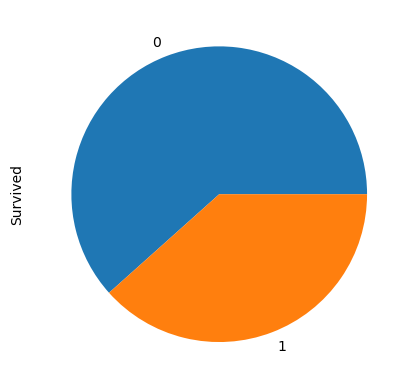

In [8]:
train.Survived.value_counts().plot.pie()

### B.Meaning of variables

In this section I will separate quantitave and qualitative data.

#### B.1.Univariate_data

##### B.1.1.Quantitative

In [9]:
train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [10]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
train_quant=train[["Age","Fare"]]

In [12]:
def plot_quantitative():
    for i in train_quant.columns.tolist():
        sns.displot(train_quant,x=i,kde=True)

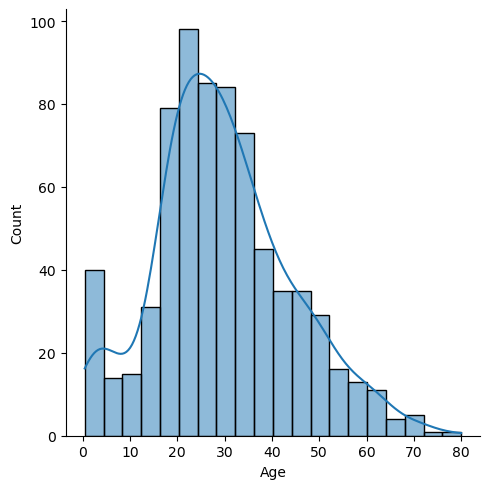

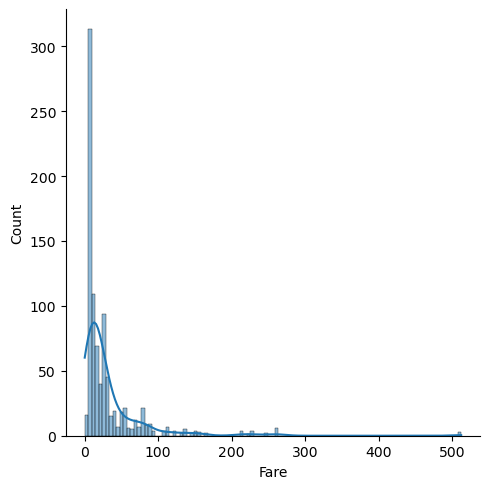

In [13]:
plot_quantitative()

It seems that there is more older people aboard the Titanic, and a mean of 30 yo.
For the fares on the Titanic, there were many people who paid less than one hundred, but there were also a significant number of people who paid more.

##### B.1.2.Qualitative

In [14]:
train_qualitative=train[['Pclass','Sex','Embarked']]

In [15]:
def plot_qualitative():
    for i in train_qualitative.columns.tolist():
        plt.figure()
        sns.countplot(data=train_qualitative,x=i)

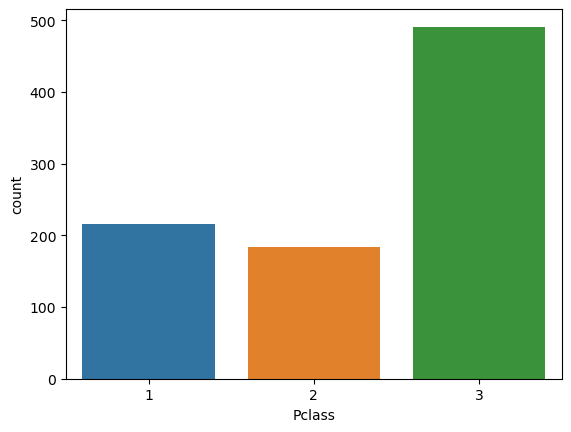

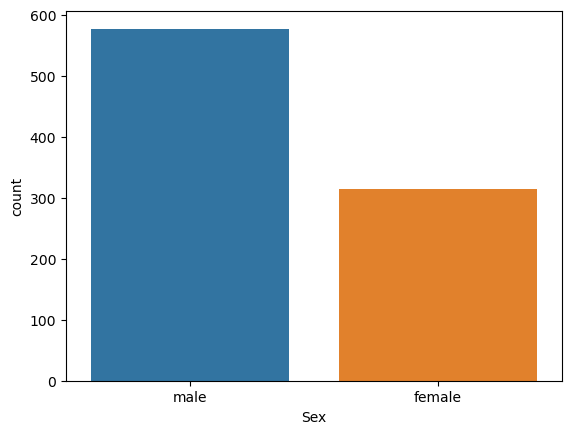

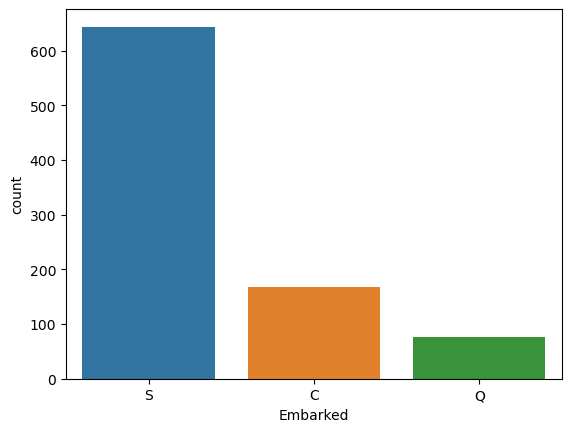

In [16]:
plot_qualitative()

### C.Relation_Variables/Target

#### C.1 Univariate_analysis

##### Qualitative_features

In [17]:
train_qualitative=train[["Pclass","SibSp","Parch","Sex","Cabin","Embarked","Survived"]]

In [18]:
train_qualitative["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

2 women travelled without the info for the port of embarkation

In [19]:
liste_cabin=np.unique(train_qualitative['Cabin'].dropna())
print(liste_cabin)

['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B19' 'B20' 'B22' 'B28' 'B3' 'B30'
 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B57 B59 B63 B66' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B78' 'B79' 'B80'
 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104' 'C106' 'C110' 'C111'
 'C118' 'C123' 'C124' 'C125' 'C126' 'C128' 'C148' 'C2' 'C22 C26'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C54'
 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C82' 'C83' 'C85' 'C86' 'C87'
 'C90' 'C91' 'C92' 'C93' 'C95' 'C99' 'D' 'D10 D12' 'D11' 'D15' 'D17' 'D19'
 'D20' 'D21' 'D26' 'D28' 'D30' 'D33' 'D35' 'D36' 'D37' 'D45' 'D46' 'D47'
 'D48' 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12' 'E121' 'E17'
 'E24' 'E25' 'E31' 'E33' 'E34' 'E36' 'E38' 'E40' 'E44' 'E46' 'E49' 'E50'
 'E58' 'E63' 'E67' 'E68' 'E77' 'E8' 'F E69' 'F G63' 'F G73' 'F2' 'F33'
 'F38' 'F4' 'G6' 'T']


In [20]:
train_qualitative['Cabin'].isna().sum()/train.shape[0]

0.7710437710437711

#### C.2 Multivariate_analysis

##### 1) Impact of Age for fare

First hypothesis : Age has a linear relationships with Fare

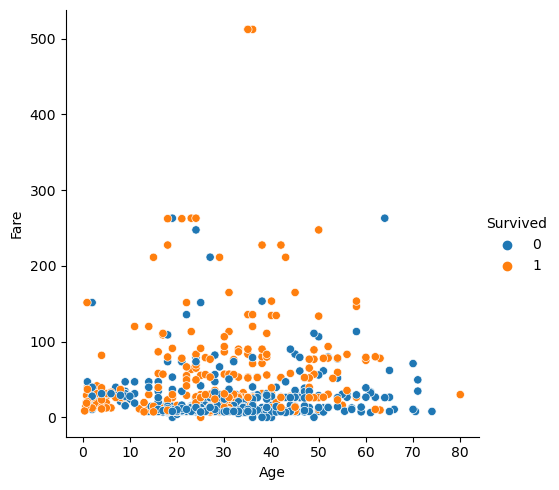

In [21]:
sns.relplot(data=train,x='Age',y="Fare",hue="Survived")

It has no significal linear relationships, so the fare don't increase by age

##### 2) Impact of SibSP and Parch

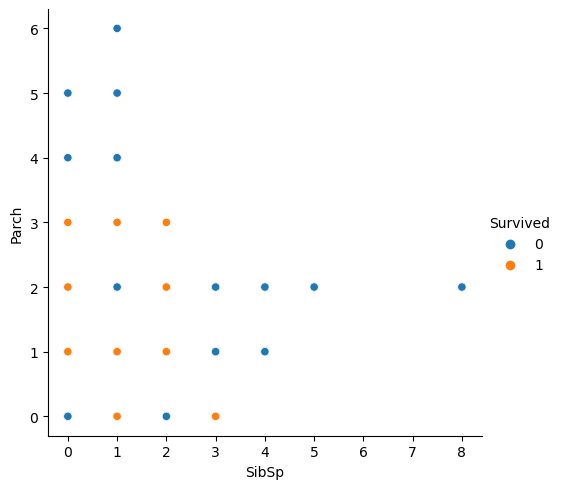

In [22]:
sns.relplot(train_qualitative,x="SibSp",y="Parch",hue="Survived")

We saw that there is more likely to survive when they came with between 1 or 3 SibSp or Parch.

##### 3) Impact of Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

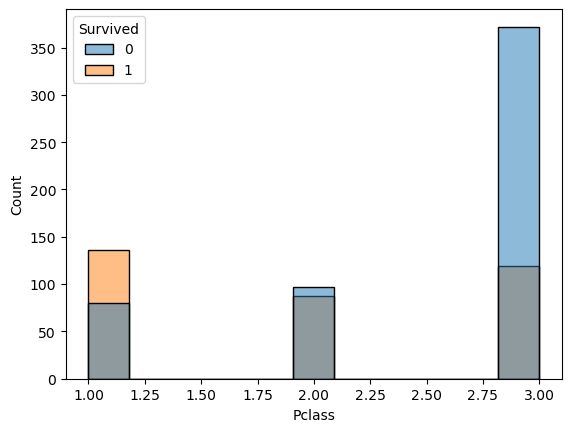

In [23]:
sns.histplot(train_qualitative,x="Pclass",hue="Survived")

In [24]:
train["Pclass"].loc[train['Survived']==1].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [25]:
train["Pclass"].loc[train['Survived']==0].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [26]:
train["Pclass"].loc[train['Survived']==1].value_counts()/train["Pclass"].value_counts()

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

We can see that premier ticket class has higher chance to survive

##### 4) Impact of Embarked

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

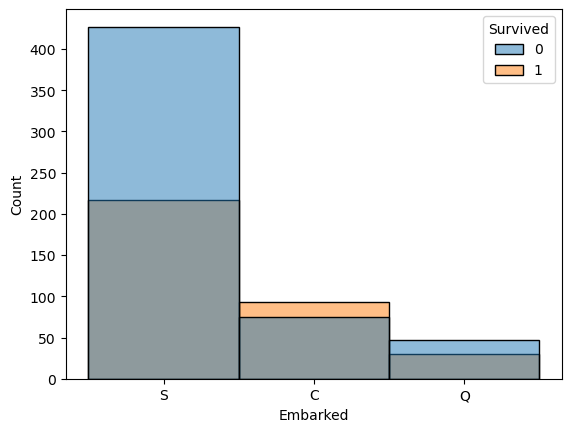

In [27]:
sns.histplot(train_qualitative,x="Embarked",hue="Survived")

In [28]:
print(train["Embarked"].loc[train['Survived']==0].value_counts())
print(train["Embarked"].loc[train['Survived']==1].value_counts())

S    427
C     75
Q     47
Name: Embarked, dtype: int64
S    217
C     93
Q     30
Name: Embarked, dtype: int64


In [29]:
train["Embarked"].loc[train['Survived']==1].value_counts()/train["Embarked"].value_counts()

S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64

C = Cherbourg, Q = Queenstown, S = Southampton  


People from Cherbourg is more likely to survive than people from other port.

##### 5) Impact of Sex

<AxesSubplot:xlabel='Sex', ylabel='Proportion'>

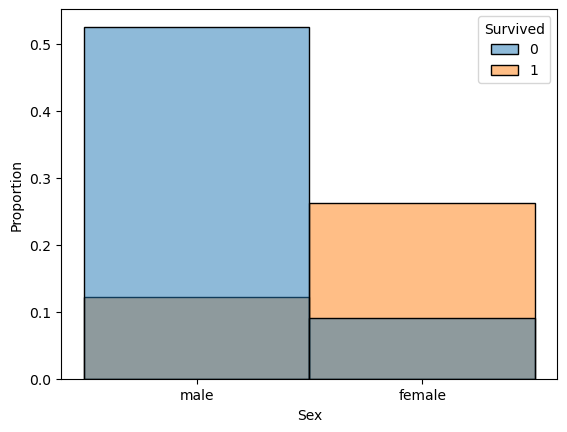

In [30]:
sns.histplot(train_qualitative,x="Sex",hue="Survived",stat="proportion")

In [31]:
train["Sex"].loc[train['Survived']==1].value_counts()/train["Sex"].value_counts()

female    0.742038
male      0.188908
Name: Sex, dtype: float64

##### 6) Impact of Cabin

In [32]:
cabin=train[['Cabin']].dropna()

In [33]:
cabin['Cabin'].str.slice(0,1).unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [34]:
cabin.reset_index(inplace=True)
cabin.drop("PassengerId",axis=1,inplace=True)

In [35]:
cabin['Cabin']=cabin['Cabin'].convert_dtypes('str')

In [36]:
cabin['Deck']=cabin['Cabin'].str.slice(0,1)

In [37]:
cabin['Room']=cabin['Cabin'].str.slice(1,4)

In [38]:
cabin['Room']

0       85
1      123
2       46
3        6
4      103
      ... 
199     35
200    51 
201     50
202     42
203    148
Name: Room, Length: 204, dtype: string

For the cabin features we can see 2 different information Deck and Room. So i will explode cabin with these informations

##### 7) Impact of Name

In [39]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

We can see that, we can explode name in 3 categories(surname, title, name)

In [40]:
train["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [41]:
title=[]
firstname=[]
surname=[]
for i in range(train.shape[0]):
    surname.append(train["Name"].str.split(",").tolist()[i][0])
    title.append(train["Name"].str.split(",").tolist()[i][1])
    firstname.append(train["Name"].str.split(",").tolist()[i][1])
    title[i]=title[i].split(" ",2)[1]
    firstname[i]=firstname[i].split(" ",2)[2]
train['Surname']=surname
train["Title"]=title
train["FirstName"]=firstname
train.drop("Name",axis=1,inplace=True)

In [42]:
train.loc[train['Survived']==1,'Title'].value_counts()

Miss.      127
Mrs.        99
Mr.         81
Master.     23
Dr.          3
Mlle.        2
Mme.         1
Ms.          1
Major.       1
Lady.        1
Sir.         1
Col.         1
the          1
Name: Title, dtype: int64

We can see that the title is an ordinal feature. 
We want to reduce the number of categorical features

In [43]:
count_title=train['Title'].value_counts()

In [44]:
train.loc[train['Sex']=="male",'Title'].value_counts()

Mr.          517
Master.       40
Rev.           6
Dr.            6
Major.         2
Col.           2
Don.           1
Sir.           1
Capt.          1
Jonkheer.      1
Name: Title, dtype: int64

In [45]:
train.loc[train['Sex']=="female",'Title'].value_counts()

Miss.    182
Mrs.     125
Mlle.      2
Mme.       1
Ms.        1
Lady.      1
the        1
Dr.        1
Name: Title, dtype: int64

In [46]:
#Count the survivor
survivor_counts = train.loc[train['Survived']==1,'Surname'].value_counts()

#Filter if people with the same surname survived
duplicates = survivor_counts[survivor_counts > 1]

# Print the result
print(duplicates)

Baclini          4
Carter           4
Harper           3
Asplund          3
Brown            3
Kelly            3
Johnson          3
Richards         3
Chambers         2
Hamalainen       2
Goldsmith        2
Herman           2
Mellinger        2
Graham           2
Taylor           2
Beckwith         2
Collyer          2
Harris           2
Bishop           2
Newell           2
Dick             2
Becker           2
Navratil         2
Hoyt             2
McCoy            2
Moor             2
Thayer           2
Hart             2
Goldenberg       2
Quick            2
Daly             2
Nakid            2
Beane            2
Coutts           2
Hays             2
Duff Gordon      2
Taussig          2
Frauenthal       2
Hippach          2
Wick             2
Ryerson          2
Peter            2
Murphy           2
Sandstrom        2
Laroche          2
West             2
Fortune          2
Doling           2
Nicola-Yarred    2
Moubarek         2
Andersson        2
Caldwell         2
Name: Surnam

In [47]:
train.loc[train['Surname']=='Carter']

Survived  Pclass     Sex   Age  SibSp  Parch  Ticket   Fare  \
PassengerId                                                                
250                 0       2    male  54.0      1      0  244252   26.0   
391                 1       1    male  36.0      1      2  113760  120.0   
436                 1       1  female  14.0      1      2  113760  120.0   
764                 1       1  female  36.0      1      2  113760  120.0   
803                 1       1    male  11.0      1      2  113760  120.0   
855                 0       2  female  44.0      1      0  244252   26.0   

               Cabin Embarked Surname    Title  \
PassengerId                                      
250              NaN        S  Carter     Rev.   
391          B96 B98        S  Carter      Mr.   
436          B96 B98        S  Carter    Miss.   
764          B96 B98        S  Carter     Mrs.   
803          B96 B98        S  Carter  Master.   
855              NaN        S  Carter     Mrs.   

                                    FirstName  
PassengerId                                    
250                          Ernest Courtenay  
391                            William Ernest  
436                               Lucile Polk  
764              William Ernest (Lucile Polk)  
803                       William Thornton II  
855          Ernest Courtenay (Lilian Hughes)

Unfortunately not the whole family survived. The older people died.

##### 7) Impact of Ticket

For the ticket features, I want to know if people with the same Ticket are more likely to Survive

In [48]:
ticket_counts=train['Ticket'].value_counts()

In [49]:
ticket_counts_over_3=train[train['Ticket'].isin(ticket_counts[ticket_counts > 3].index)]

In [50]:
ticket_counts_over_3['Ticket'].unique()

array(['349909', '347082', '382652', '347077', '19950', '3101295',
       'CA 2144', '347088', 'S.O.C. 14879', '1601', 'W./C. 6608',
       'CA. 2343', '4133', 'LINE', '113781', '17421', 'PC 17757',
       '113760', '2666'], dtype=object)

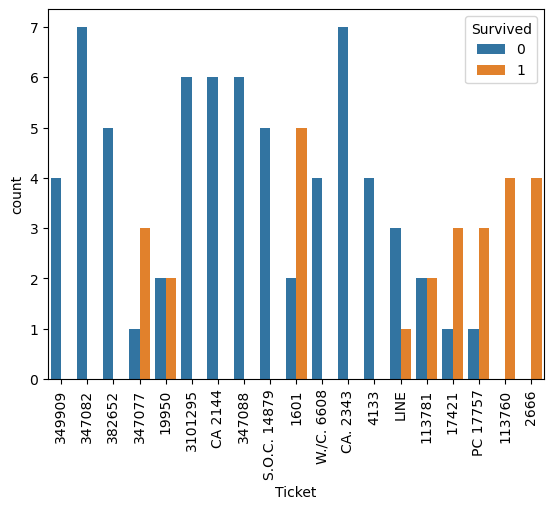

In [51]:
plt.figure()
sns.countplot(data=ticket_counts_over_3,x="Ticket",hue="Survived")
plt.xticks(rotation=90)
plt.show()

People with the same ticket number are more likely to either all survive or all die. Only 7 out of 19 people with a shared ticket number are separated, some survived and some died.
We need more data to ensure our hypothesis


<AxesSubplot:xlabel='Ticket', ylabel='count'>

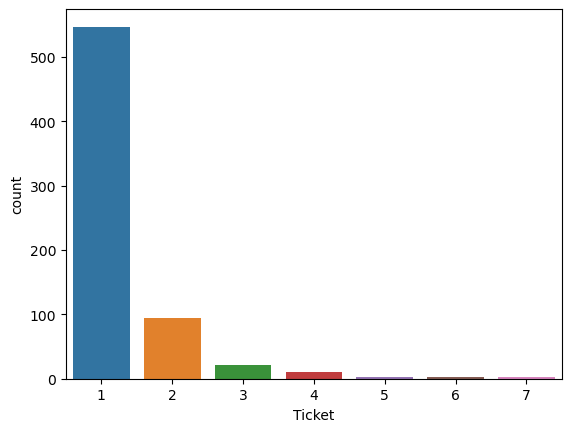

In [52]:
sns.countplot(data=train,x=train['Ticket'].value_counts())

In [53]:
ticket_counts_over_2=train[train['Ticket'].isin(ticket_counts[ticket_counts > 2].index)]

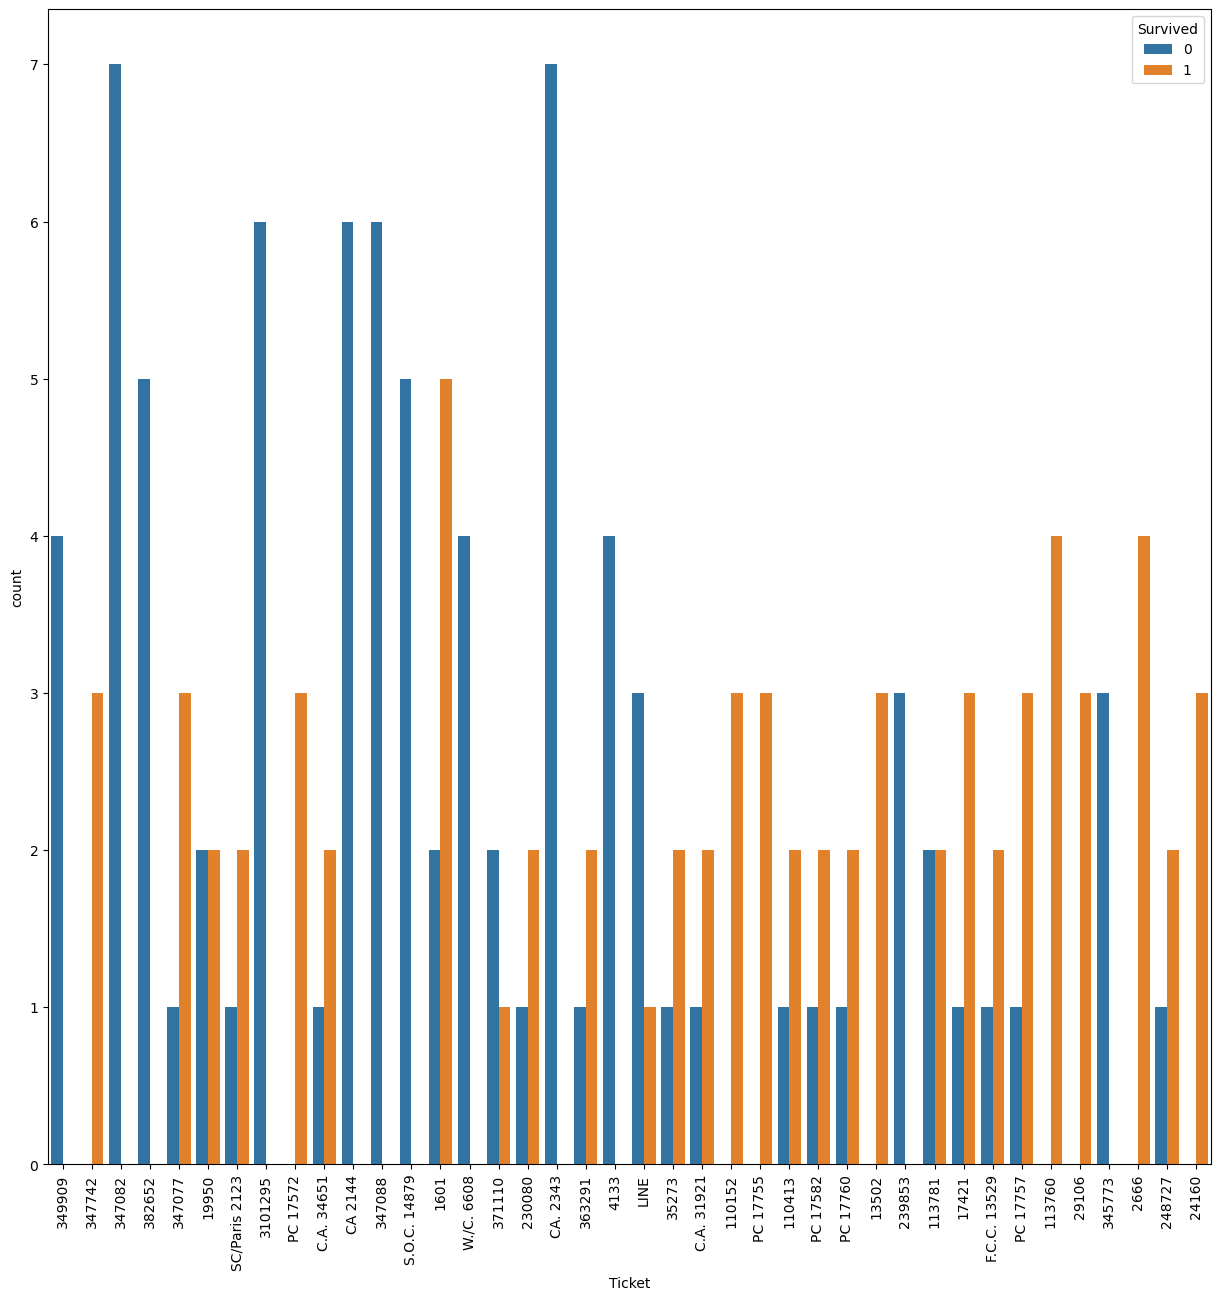

In [54]:
plt.figure(figsize=(15,15))
sns.countplot(data=ticket_counts_over_2,x="Ticket",hue="Survived")
plt.xticks(rotation=90)
plt.show()

In [55]:
ticket_counts_over_1=train[train['Ticket'].isin(ticket_counts[ticket_counts > 1].index)]
ticket_counts_over_1["Survived"].value_counts()

1    179
0    165
Name: Survived, dtype: int64

In [56]:
ticket_counts_over_2["Survived"].value_counts()

0    85
1    71
Name: Survived, dtype: int64

In [57]:
ticket_counts_over_3["Survived"].value_counts()

0    66
1    27
Name: Survived, dtype: int64

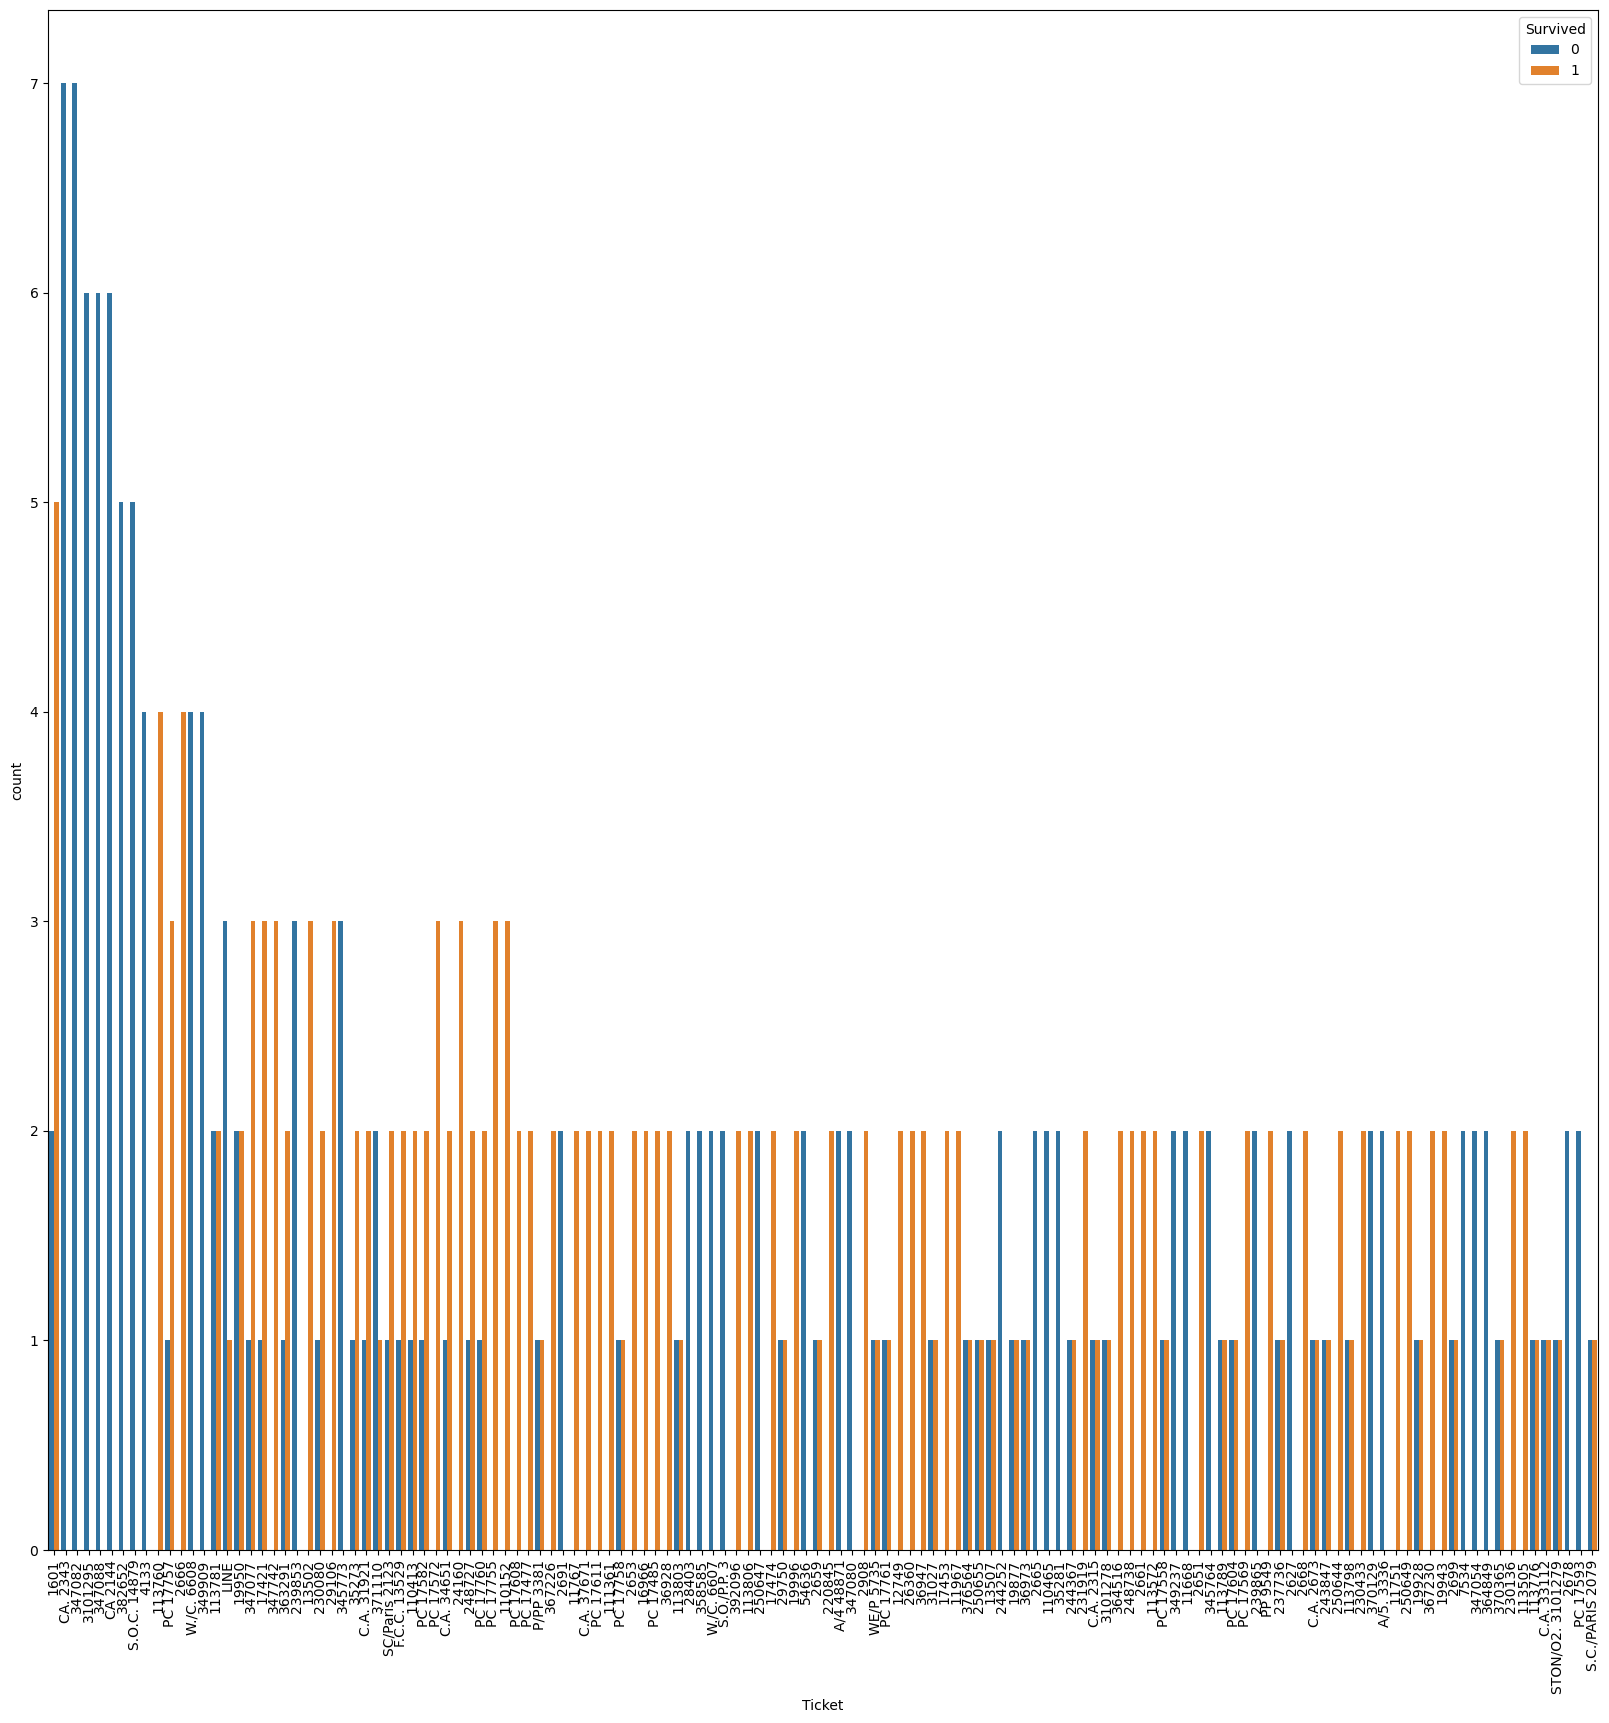

In [58]:
plt.figure(figsize=(20,20))
sns.countplot(data=ticket_counts_over_1,x="Ticket",hue="Survived",order = ticket_counts_over_1['Ticket'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

It's look like 50/50 some people die with the same ticket and other don't. 

Now we will see the correlation with other features.

A ticket might be in relation with Age and Sex

In [59]:
train['Surname'].value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Surname, Length: 667, dtype: int64

Let's look closer for the 2 biggest family

In [60]:
train.loc[train['Surname']=='Andersson']

Survived  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare  \
PassengerId                                                                   
14                  0       3    male  39.0      1      5   347082  31.2750   
69                  1       3  female  17.0      4      2  3101281   7.9250   
120                 0       3  female   2.0      4      2   347082  31.2750   
147                 1       3    male  27.0      0      0   350043   7.7958   
542                 0       3  female   9.0      4      2   347082  31.2750   
543                 0       3  female  11.0      4      2   347082  31.2750   
611                 0       3  female  39.0      1      5   347082  31.2750   
814                 0       3  female   6.0      4      2   347082  31.2750   
851                 0       3    male   4.0      4      2   347082  31.2750   

            Cabin Embarked    Surname    Title  \
PassengerId                                      
14            NaN        S  Andersson      Mr.   
69            NaN        S  Andersson    Miss.   
120           NaN        S  Andersson    Miss.   
147           NaN        S  Andersson      Mr.   
542           NaN        S  Andersson    Miss.   
543           NaN        S  Andersson    Miss.   
611           NaN        S  Andersson     Mrs.   
814           NaN        S  Andersson    Miss.   
851           NaN        S  Andersson  Master.   

                                             FirstName  
PassengerId                                             
14                                        Anders Johan  
69                                      Erna Alexandra  
120                                   Ellis Anna Maria  
147                      August Edvard ("Wennerstrom")  
542                                Ingeborg Constanzia  
543                                   Sigrid Elisabeth  
611          Anders Johan (Alfrida Konstantia Brogren)  
814                                  Ebba Iris Alfrida  
851                               Sigvard Harald Elias

In [61]:
train.loc[train['Surname']=='Sage']

Survived  Pclass     Sex  Age  SibSp  Parch    Ticket   Fare  \
PassengerId                                                                 
160                 0       3    male  NaN      8      2  CA. 2343  69.55   
181                 0       3  female  NaN      8      2  CA. 2343  69.55   
202                 0       3    male  NaN      8      2  CA. 2343  69.55   
325                 0       3    male  NaN      8      2  CA. 2343  69.55   
793                 0       3  female  NaN      8      2  CA. 2343  69.55   
847                 0       3    male  NaN      8      2  CA. 2343  69.55   
864                 0       3  female  NaN      8      2  CA. 2343  69.55   

            Cabin Embarked Surname    Title              FirstName  
PassengerId                                                         
160           NaN        S    Sage  Master.           Thomas Henry  
181           NaN        S    Sage    Miss.       Constance Gladys  
202           NaN        S    Sage      Mr.              Frederick  
325           NaN        S    Sage      Mr.         George John Jr  
793           NaN        S    Sage    Miss.            Stella Anna  
847           NaN        S    Sage      Mr.         Douglas Bullen  
864           NaN        S    Sage    Miss.  Dorothy Edith "Dolly"

Ticket seem to be corrolate to other features.

In [62]:
train.corr().loc[train.corr()['Survived']>=0.2]

Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

In [63]:
train.corr().loc[train.corr()['Survived']<=-0.2]

Survived  Pclass       Age     SibSp     Parch    Fare
Pclass -0.338481     1.0 -0.369226  0.083081  0.018443 -0.5495

### 8) Impact of Age

Second hypothesis : People between 18 and 50 tends to survive

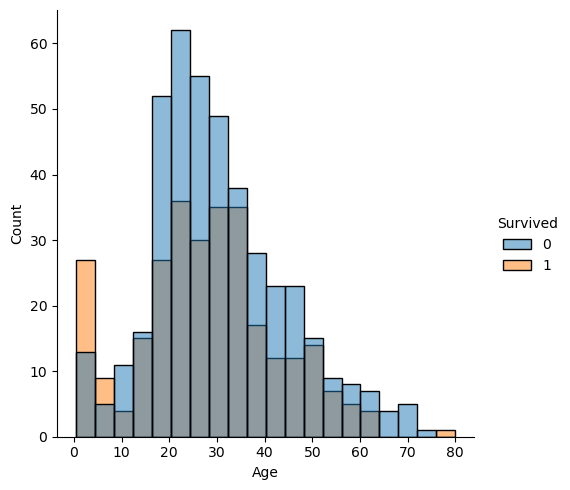

In [64]:
sns.displot(data=train,x='Age',hue="Survived")

In [65]:
(train.Age.loc[train['Survived']==1].value_counts()/train.Age.value_counts()).dropna().sort_values(ascending=True)

47.00    0.111111
37.00    0.166667
20.00    0.200000
43.00    0.200000
21.00    0.208333
           ...   
0.83     1.000000
0.75     1.000000
0.67     1.000000
63.00    1.000000
80.00    1.000000
Name: Age, Length: 65, dtype: float64

In [66]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [67]:
(train.Age.loc[train['Survived']==1].value_counts()/train.Age.value_counts()).dropna().sort_values(ascending=True)

47.00    0.111111
37.00    0.166667
20.00    0.200000
43.00    0.200000
21.00    0.208333
           ...   
0.83     1.000000
0.75     1.000000
0.67     1.000000
63.00    1.000000
80.00    1.000000
Name: Age, Length: 65, dtype: float64

In [68]:
train.loc[(train['Age'] >= 18) & (train['Age'] <= 50), 'Survived'].value_counts()

0    330
1    207
Name: Survived, dtype: int64

In [69]:
train.loc[(train['Age'] < 18) | (train['Age'] > 50), 'Survived'].value_counts()

0    94
1    83
Name: Survived, dtype: int64

In [70]:
train.loc[(train['Age'] >= 18) & (train['Age'] <= 50), 'Survived'].value_counts()[1]/train.loc[(train['Age'] >= 18) & (train['Age'] <= 50), 'Survived'].value_counts().sum()

0.3854748603351955

In [71]:
train.loc[(train['Age'] < 18) | (train['Age'] > 50), 'Survived'].value_counts()[1]/train.loc[(train['Age'] < 18) | (train['Age'] > 50), 'Survived'].value_counts().sum()

0.4689265536723164

We can see it's actually the opposite!

In [72]:
age_list = train.Age.loc[train['Survived']==1].tolist()
age_count = pd.Series(age_list).value_counts()
age_count_sorted = age_count.sort_values(ascending=False)
print(age_count_sorted)

24.00    15
27.00    11
22.00    11
36.00    11
35.00    11
         ..
37.00     1
43.00     1
11.00     1
0.42      1
47.00     1
Length: 65, dtype: int64


# Modelisation

## Pre-processing

### 3.1)Nan_values

In [73]:
train.isna().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
Surname        0
Title          0
FirstName      0
dtype: int64

In [74]:
#Replace by the most frequent value
train['Age'].fillna(train['Age'].value_counts().idxmax(),inplace=True)

In [75]:
#Replace by U for uknown
train['Embarked'].fillna("U")

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

### 3.2)Encoding

In [76]:
print(train.select_dtypes("object").columns)
train.select_dtypes("object")

Index(['Sex', 'Ticket', 'Cabin', 'Embarked', 'Surname', 'Title', 'FirstName'], dtype='object')


Sex            Ticket Cabin Embarked    Surname  Title  \
PassengerId                                                              
1              male         A/5 21171   NaN        S     Braund    Mr.   
2            female          PC 17599   C85        C    Cumings   Mrs.   
3            female  STON/O2. 3101282   NaN        S  Heikkinen  Miss.   
4            female            113803  C123        S   Futrelle   Mrs.   
5              male            373450   NaN        S      Allen    Mr.   
...             ...               ...   ...      ...        ...    ...   
887            male            211536   NaN        S   Montvila   Rev.   
888          female            112053   B42        S     Graham  Miss.   
889          female        W./C. 6607   NaN        S   Johnston  Miss.   
890            male            111369  C148        C       Behr    Mr.   
891            male            370376   NaN        Q     Dooley    Mr.   

                                         FirstName  
PassengerId                                         
1                                      Owen Harris  
2            John Bradley (Florence Briggs Thayer)  
3                                            Laina  
4                    Jacques Heath (Lily May Peel)  
5                                    William Henry  
...                                            ...  
887                                         Juozas  
888                                 Margaret Edith  
889                       Catherine Helen "Carrie"  
890                                    Karl Howell  
891                                        Patrick  

[891 rows x 7 columns]

Nominale { Sex ==> 0/1 Label Binarizer
           Ticket==> OHE
           Embarked ==> OHE
           Deck ==> OHE
           Surname ==> OHE
           FirtName==> OHE
}
Ordinale { Title ==> LabelOrdinalEncoder    
}

In [77]:
 def encode(data):
        # Sex Binary encoding
        data.loc[data['Sex'] == "female", "Sex"] = 0
        data.loc[data['Sex'] == "male", "Sex"] = 1
        # Title Ordinal encoding
        data.loc[data['Title'] == "Miss.", 'Title'] = 0
        data.loc[data['Title'] == "Mr.", 'Title'] = 0
        data.loc[data['Title'] == "Mrs.", 'Title'] = 1     
        data.loc[data['Title'] == "Master.", 'Title'] = 1
        data.loc[(~data['Title'].isin([0, 1])), 'Title'] = 2
        # One Hot Encoding
        data = pd.get_dummies(data, columns=['Ticket', 'Embarked', 'Deck', 'Surname', 'FirstName'])
        return data

### D.Feature_engineering

In [78]:
train["AverageFarePclass"]=train["Fare"].loc[train['Pclass']==1].mean()

train["AverageFarePclass"] = train.groupby("Pclass")["Fare"].transform("mean")

train["AverageFareEmbarked"] = train.groupby("Embarked")["Fare"].transform("mean")
train['AverageFareEmbarked'].fillna(train['AverageFareEmbarked'].median(),inplace=True)

train["AverageFareSibSp"] = train.groupby("SibSp")["Fare"].transform("mean")

train["AverageFareParch"] = train.groupby("Parch")["Fare"].transform("mean")

bins = [0, 18, 35, 50, 80]
labels = ['0', '1', '2', '3']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)
train['AgeGroup'] = train['AgeGroup'].astype(float)

train["SurvivorFamily"] = 0
train.loc[(train['Parch'] >= 1) & (train['Parch'] <= 3) & (train['SibSp'] >= 1) & (train['SibSp'] <= 3), "SurvivorFamily"] = 1

def explode_cabin(X):
    X['Deck']=X['Cabin'].str.slice(0,1)
    X['Room']=X['Cabin'].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

explode_cabin(train)

train.drop('Cabin',axis=1,inplace=True)

#Imputation
#Fill the NaN valus with N it means no Deck
train['Deck'].fillna('N',inplace=True)

#Imputation
#Fill NaN values with 0, it means we doesn't know the room
train['Room'].fillna(0,inplace=True)

train.loc[train['Survived']==1,'Deck'].value_counts()

train=encode(train)

In [79]:
# Already did before
""""

title=[]
firstname=[]
surname=[]
for i in range(train.shape[0]):
    surname.append(train["Name"].str.split(",").tolist()[i][0])
    title.append(train["Name"].str.split(",").tolist()[i][1])
    firstname.append(train["Name"].str.split(",").tolist()[i][1])
    title[i]=title[i].split(" ",2)[1]
    firstname[i]=firstname[i].split(" ",2)[2]
train['Surname']=surname
train["Title"]=title
train["FirstName"]=firstname
train.drop("Name",axis=1,inplace=True)

"""

'"\n\ntitle=[]\nfirstname=[]\nsurname=[]\nfor i in range(train.shape[0]):\n    surname.append(train["Name"].str.split(",").tolist()[i][0])\n    title.append(train["Name"].str.split(",").tolist()[i][1])\n    firstname.append(train["Name"].str.split(",").tolist()[i][1])\n    title[i]=title[i].split(" ",2)[1]\n    firstname[i]=firstname[i].split(" ",2)[2]\ntrain[\'Surname\']=surname\ntrain["Title"]=title\ntrain["FirstName"]=firstname\ntrain.drop("Name",axis=1,inplace=True)\n\n'

In [80]:
#Transform object to int
object_cols = train.select_dtypes("object").columns
train[object_cols] = train[object_cols].astype('int')

In [81]:
train.select_dtypes("category").columns

Index([], dtype='object')

In [82]:
#Transform all the data to float
train = train.astype(float)

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Columns: 2174 entries, Survived to FirstName_Yousseff
dtypes: float64(2174)
memory usage: 14.8 MB


In [84]:
train.columns[train.isna().any()].tolist()

[]

### 3.3)Train_test_split

In [85]:
from sklearn.model_selection import train_test_split
# Split data into features and target
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

I find data leakage for train : because i used conditioning from the taget value directly

### 3.4) Function preprocessing

In [86]:
def preprocess(data):
    def handle_missing(data):
        # Loop through columns in dataframe
        for col in data.columns:
            # Check if column has missing values
            if data[col].isna().sum() > 0:
                # Replace missing values with the column's mode or median, depending on data type
                if data[col].dtype == "object":
                    data[col].fillna(data[col].mode()[0], inplace=True)
                else:
                    data[col].fillna(data[col].median(), inplace=True)
        return data

    def preprocess_data(data):
        # Create new feature for average fare per Pclass
        data["AverageFarePclass"] = data.groupby("Pclass")["Fare"].transform("mean")
        # Fill Embarked and create new feature for average fare per Embarked
        data['Embarked'].fillna("U", inplace=True)
        data["AverageFareEmbarked"] = data.groupby("Embarked")["Fare"].transform("mean")
        data['AverageFareEmbarked'].fillna(data['AverageFareEmbarked'].median(), inplace=True)
        # Create new feature for average fare per SibSp
        data["AverageFareSibSp"] = data.groupby("SibSp")["Fare"].transform("mean")
        # Create new feature for average fare per Parch
        data["AverageFareParch"] = data.groupby("Parch")["Fare"].transform("mean")
        # Create new features for age groups and survival
        data['Age'].fillna(data['Age'].value_counts().idxmax(), inplace=True)
        bins = [0, 18, 35, 50, 80]
        labels = ['0', '1', '2', '3']
        data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels).astype(float)
        # Create new feature for family survival
        data["SurvivorFamily"] = 0
        data.loc[(data['Parch'] >= 1) & (data['Parch'] <= 3) & (data['SibSp'] >= 1) & (data['SibSp'] <= 3), "SurvivorFamily"] = 1
        # Create new features for deck and room from Cabin
        data['Deck'] = data['Cabin'].str.slice(0,1)
        data['Room'] = data['Cabin'].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
        data.drop('Cabin', axis=1, inplace=True)
        data['Deck'].fillna('N', inplace=True)
        data['Room'].fillna(0, inplace=True)
        # Create new features for name
        surname = data["Name"].str.split(",").str[0]
        title = data["Name"].str.split(",").str[1].str.split(" ",2).str[1]
        firstname = data["Name"].str.split(",").str[1].str.split(" ",2).str[2]
        data['Surname'] = surname
        data['Title'] = title
        data['FirstName'] = firstname
        return data

    def encode(data):
        # Sex Binary encoding
        data.loc[data['Sex'] == "female", "Sex"] = 0
        data.loc[data['Sex'] == "male", "Sex"] = 1
        # Title Ordinal encoding
        data.loc[data['Title'] == "Miss.", 'Title'] = 0
        data.loc[data['Title'] == "Mr.", 'Title'] = 0
        data.loc[data['Title'] == "Mrs.", 'Title'] = 1     
        data.loc[data['Title'] == "Master.", 'Title'] = 1
        data.loc[(~data['Title'].isin([0, 1])), 'Title'] = 2
        # One Hot Encoding
        data = pd.get_dummies(data, columns=['Ticket', 'Embarked', 'Deck', 'Surname', 'FirstName'])
        return data
    
    data=preprocess_data(data)
    data=encode(data)
    data=data[list_features]
    data=handle_missing(data)
    return data


## Modele_selection

For this section we will try different models and find the best one.

### List of model

#### BaggingClassifier

In [87]:
""""
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,cross_val_predict, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
cv=StratifiedKFold(n_splits=5)

param_grid = {'n_estimators': [10, 50, 100, 500, 1000]}
bag_clf = BaggingClassifier()
grid_search = GridSearchCV(bag_clf, param_grid, cv=cv)
grid_search.fit(X_train, y_train.values.ravel())

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

bag_clf = BaggingClassifier(n_estimators=grid_search.best_params_['n_estimators'])
bag_clf.fit(X_train, y_train)

# perform cross-validation on training set
cv_scores = cross_val_score(bag_clf, X_train, y_train, cv=cv)
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean accuracy: ", np.mean(cv_scores))

y_pred = bag_clf.predict(X_val)

# calculate accuracy, confusion matrix, and classification report on validation set
accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Accuracy score:", accuracy)
print("Confusion matrix:\n", cm)
print("Classification report:\n", report)

# perform cross-validation predictions on validation set
y_pred_cv = cross_val_predict(bag_clf, X_val, y_val, cv=cv)

# calculate confusion matrix and classification report on cross-validated predictions
cm_cv = confusion_matrix(y_val, y_pred_cv)
report_cv = classification_report(y_val, y_pred_cv)

print("Cross-validation confusion matrix:\n", cm_cv)
print("Cross-validation classification report:\n", report_cv)
"""

'"\nfrom sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,cross_val_predict, cross_val_score\nfrom sklearn.ensemble import BaggingClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score,confusion_matrix, classification_report\n\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)\ncv=StratifiedKFold(n_splits=5)\n\nparam_grid = {\'n_estimators\': [10, 50, 100, 500, 1000]}\nbag_clf = BaggingClassifier()\ngrid_search = GridSearchCV(bag_clf, param_grid, cv=cv)\ngrid_search.fit(X_train, y_train.values.ravel())\n\nprint("Best parameters:", grid_search.best_params_)\nprint("Best cross-validation score:", grid_search.best_score_)\n\nbag_clf = BaggingClassifier(n_estimators=grid_search.best_params_[\'n_estimators\'])\nbag_clf.fit(X_train, y_train)\n\n# perform cross-validation on training set\ncv_scores = cross_val_score(bag_clf, X_train, y_train, cv=cv)\nprint("Cross-validation ac

#### VotingClassifier

In [88]:
""""
from tqdm import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the classifiers to include in the voting classifier
log_clf = LogisticRegression(max_iter=10000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
# Fit the classifiers on the training data
log_clf.fit(X_train, y_train)
rnd_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
# Define the parameter grid for the grid search
param_grid = {'lr__C': [0.01, 0.1, 1],
              'rf__n_estimators': [50, 100],
              'svc__C': [1, 10],
              'svc__gamma': [0.1, 1]}

# Define the voting classifier and the grid search object
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
grid_search = GridSearchCV(voting_clf, param_grid, cv=5, verbose=2)

# Train and evaluate the model using a progress bar to track progress
with tqdm(total=100, desc="Fitting VotingClassifier") as pbar:
    # Fit the voting classifier with grid search on the training data
    grid_search.fit(X_train, y_train.values.ravel())
    pbar.update(20)

    # Perform cross-validation on the random forest classifier
    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(rnd_clf, X_train, y_train, cv=cv)
    print(f"Cross-validation accuracy scores: {scores}")
    print(f"Mean accuracy:{np.mean(scores)}")
    pbar.update(20)

    # Evaluate the random forest classifier on the validation set
    y_pred = rnd_clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    print(f"Accuracy score:{accuracy}")
    print(f"Confusion matrix:{cm}")
    print(f"Classification report :{report}")
    pbar.update(20)

    # Perform cross-validation predictions on the validation set
    y_pred_cv = cross_val_predict(rnd_clf, X_val, y_val, cv=cv)
    # Calculate the confusion matrix and classification report for the cross-validated predictions
    cm_cv = confusion_matrix(y_val, y_pred_cv)
    report_cv = classification_report(y_val, y_pred_cv)

    print(f"Cross-validation confusion matrix:{cm_cv}")
    print(f"Cross-validation classification report:{report_cv}")
    pbar.update(20)

    # Calculate the cross-validation results for the voting classifier on the training set
    result_train = cross_val_score(voting_clf, X_train, y_train.values.ravel(), cv=cv)

    # Fit the voting classifier on the training set
    voting_clf.fit(X_train, y_train.values.ravel())
    pbar.update(20)

    # Evaluate the voting classifier on the validation set
    y_val_pred = voting_clf.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_val_pred)

"""

'"\nfrom tqdm import tqdm\nfrom sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV\nfrom sklearn.metrics import confusion_matrix, classification_report, accuracy_score\nfrom sklearn.ensemble import RandomForestClassifier, VotingClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\nimport numpy as np\n\n# Split the data into training and validation sets\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)\n\n# Define the classifiers to include in the voting classifier\nlog_clf = LogisticRegression(max_iter=10000)\nrnd_clf = RandomForestClassifier()\nsvm_clf = SVC()\n# Fit the classifiers on the training data\nlog_clf.fit(X_train, y_train)\nrnd_clf.fit(X_train, y_train)\nsvm_clf.fit(X_train, y_train)\n# Define the parameter grid for the grid search\nparam_grid = {\'lr__C\': [0.01, 0.1, 1],\n              \'rf__n_estimators\': [50, 100],\n              \'svc__C\': [1, 

#### RandomForestClassifier

In [89]:
""""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

cv = StratifiedKFold(n_splits=5)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the parameter grid for the grid search
param_grid = {'n_estimators': [10, 20, 50, 100, 200, 500]}

# Define the random forest classifier and the grid search object
rnd_clf = RandomForestClassifier()
grid_search = GridSearchCV(rnd_clf, param_grid, cv=cv)

# Train and evaluate the model using a progress bar to track progress
with tqdm(total=100, desc="Fitting RandomForestClassifier") as pbar:
    # Find the best parameters using grid search on the training data
    grid_search.fit(X_train, y_train)
    print(f"Best cross-validation score: {grid_search.best_score_}")
    print(f"Best parameters: {grid_search.best_params_}")
    pbar.update(20)

    # Create a new random forest classifier with the best parameters found by grid search
    rnd_clf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'])
    # Fit the random forest classifier on the training set
    rnd_clf.fit(X_train, y_train)
    pbar.update(20)

    # Perform cross-validation on the training set
    scores = cross_val_score(rnd_clf, X_train, y_train, cv=cv)
    print(f"Cross-validation accuracy scores: {scores}")
    print(f"Mean accuracy: {np.mean(scores)}")
    pbar.update(20)

    # Evaluate the random forest classifier on the validation set
    y_pred = rnd_clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    print(f"Accuracy score: {accuracy}")
    print(f"Confusion matrix: {cm}")
    print(f"Classification report: {report}")
    pbar.update(20)

    # Perform cross-validation predictions on the validation set
    y_pred_cv = cross_val_predict(rnd_clf, X_val, y_val, cv=cv)
    # Calculate the confusion matrix and classification report for the cross-validated predictions
    cm_cv = confusion_matrix(y_val, y_pred_cv)
    report_cv = classification_report(y_val, y_pred_cv)
    print(f"Cross-validation confusion matrix: {cm_cv}")
    print(f"Cross-validation classification report: {report_cv}")
    pbar.update(20)
    """

'"\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report\nimport numpy as np\n\ncv = StratifiedKFold(n_splits=5)\n\n# Split the data into training and validation sets\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)\n\n# Define the parameter grid for the grid search\nparam_grid = {\'n_estimators\': [10, 20, 50, 100, 200, 500]}\n\n# Define the random forest classifier and the grid search object\nrnd_clf = RandomForestClassifier()\ngrid_search = GridSearchCV(rnd_clf, param_grid, cv=cv)\n\n# Train and evaluate the model using a progress bar to track progress\nwith tqdm(total=100, desc="Fitting RandomForestClassifier") as pbar:\n    # Find the best parameters using grid search on the training data\n    grid_search.fit(X_train, y_train)\n    print(f"Best cross-valida

#### AdaBoostClassifier

In [90]:
""""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm


# Split your data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the AdaBoostClassifier model and parameter grid
ada_clf = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.1, 0.5, 1.0, 2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Perform grid search with 5-fold cross validation to find the best hyperparameters
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(ada_clf, param_grid=param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best cross-validation score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

# Use the best estimator from the grid search for prediction on the validation set
best_ada_clf = grid_search.best_estimator_
y_val_pred = best_ada_clf.predict(X_val)

# Calculate accuracy, confusion matrix, and classification report on validation set
accuracy = accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)

print("Accuracy score:", accuracy)
print("Confusion matrix:\n", cm)
print("Classification report:\n", report)

# Perform cross-validation on best classifier
cv_scores = []
for train_index, test_index in tqdm(cv.split(X_train, y_train)):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    best_ada_clf.fit(X_train_cv, y_train_cv)
    cv_scores.append(best_ada_clf.score(X_test_cv, y_test_cv))

print("Cross-validation accuracy scores: ", cv_scores)
print("Mean accuracy: ", np.mean(cv_scores))

# Perform cross-validation predictions on validation set
y_pred_cv = cross_val_predict(best_ada_clf, X_val, y_val, cv=cv)

# Calculate confusion matrix and classification report on cross-validated predictions
cm_cv = confusion_matrix(y_val, y_pred_cv)
report_cv = classification_report(y_val, y_pred_cv)

print("Cross-validation confusion matrix:\n", cm_cv)
print("Cross-validation classification report:\n", report_cv)
"""

'"\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report\nfrom tqdm import tqdm\n\n\n# Split your data into train and validation sets\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)\n\n# Define the AdaBoostClassifier model and parameter grid\nada_clf = AdaBoostClassifier()\n\nparam_grid = {\n    \'n_estimators\': [50, 100, 200, 500, 1000],\n    \'learning_rate\': [0.1, 0.5, 1.0, 2.0],\n    \'algorithm\': [\'SAMME\', \'SAMME.R\']\n}\n\n# Perform grid search with 5-fold cross validation to find the best hyperparameters\ncv = StratifiedKFold(n_splits=5)\ngrid_search = GridSearchCV(ada_clf, param_grid=param_grid, cv=cv)\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters and the best cross-va

### Best model

#### 1) Overfitting

In [91]:
np.all(np.isfinite(train))

True

In [92]:
np.any(np.isnan(train))

False

Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200} for the first hyper parameter tuning from gridsearch

In [93]:
from sklearn.ensemble import AdaBoostClassifier
best_ada_clf = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0, n_estimators=200)
best_ada_clf.fit(X_train,y_train)
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=5)

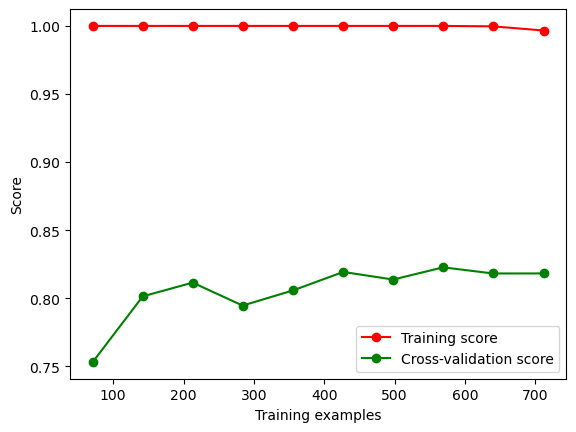

In [94]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
# define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_ada_clf, X, y, train_sizes=train_sizes, cv=cv)

# plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


We can observe overfitting.

#### 2) Yeo-Johnson transformation

In [95]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
X=train.drop("Survived",axis=1)
y=train['Survived']
X=pt.fit_transform(X)
l=train.columns.tolist()
l.remove('Survived')
X=pd.DataFrame(X,columns=l)

In [96]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# AdaBoostClassifier training
best_ada_clf = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 1.0, n_estimators = 200)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
cv= StratifiedKFold(n_splits=5)
best_ada_clf.fit(X_train,y_train)
y_val_pred = best_ada_clf.predict(X_val)

# Calculate accuracy, confusion matrix, and classification report on validation set
accuracy = accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)

print("Accuracy score:", accuracy)
print("Confusion matrix:\n", cm)
print("Classification report:\n", report)

# Perform cross-validation on best classifier
cv_scores = []
for train_index, test_index in tqdm(cv.split(X_train, y_train)):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    best_ada_clf.fit(X_train_cv, y_train_cv)
    cv_scores.append(best_ada_clf.score(X_test_cv, y_test_cv))

print("Cross-validation accuracy scores: ", cv_scores)
print("Mean accuracy: ", np.mean(cv_scores))

# Perform cross-validation predictions on validation set
y_pred_cv = cross_val_predict(best_ada_clf, X_val, y_val, cv=cv)

# Calculate confusion matrix and classification report on cross-validated predictions
cm_cv = confusion_matrix(y_val, y_pred_cv)
report_cv = classification_report(y_val, y_pred_cv)

print("Cross-validation confusion matrix:\n", cm_cv)
print("Cross-validation classification report:\n", report_cv)

#Compare result with YEO-JOHNSON transform
pt= PowerTransformer()
X=train.drop("Survived",axis=1)
y=train['Survived']
X=pt.fit_transform(X)
l=train.columns.tolist()
l.remove('Survived')
X=pd.DataFrame(X,columns=l)
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_val_transformed = pt.fit_transform(X_val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

best_ada_clf.fit(X_train,y_train)
y_val_pred = best_ada_clf.predict(X_val)

# Calculate accuracy, confusion matrix, and classification report on validation set
accuracy = accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)

print("Accuracy score:", accuracy)
print("Confusion matrix:\n", cm)
print("Classification report:\n", report)

# Perform cross-validation on best classifier
cv_scores = []
for train_index, test_index in tqdm(cv.split(X_train, y_train)):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    best_ada_clf.fit(X_train_cv, y_train_cv)
    cv_scores.append(best_ada_clf.score(X_test_cv, y_test_cv))

print("Cross-validation accuracy scores: ", cv_scores)
print("Mean accuracy: ", np.mean(cv_scores))

# Perform cross-validation predictions on validation set
y_pred_cv = cross_val_predict(best_ada_clf, X_val, y_val, cv=cv)

# Calculate confusion matrix and classification report on cross-validated predictions
cm_cv = confusion_matrix(y_val, y_pred_cv)
report_cv = classification_report(y_val, y_pred_cv)

print("Cross-validation confusion matrix:\n", cm_cv)
print("Cross-validation classification report:\n", report_cv)



Accuracy score: 0.7966101694915254
Confusion matrix:
 [[155  20]
 [ 40  80]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       175
         1.0       0.80      0.67      0.73       120

    accuracy                           0.80       295
   macro avg       0.80      0.78      0.78       295
weighted avg       0.80      0.80      0.79       295



5it [00:09,  1.85s/it]


Cross-validation accuracy scores:  [0.7833333333333333, 0.8739495798319328, 0.8067226890756303, 0.8319327731092437, 0.865546218487395]
Mean accuracy:  0.8322969187675071
Cross-validation confusion matrix:
 [[147  28]
 [ 27  93]]
Cross-validation classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       175
         1.0       0.77      0.78      0.77       120

    accuracy                           0.81       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.81      0.81      0.81       295



/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy score: 0.8033898305084746
Confusion matrix:
 [[161  14]
 [ 44  76]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       175
         1.0       0.84      0.63      0.72       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.81      0.80      0.80       295



5it [00:09,  1.87s/it]


Cross-validation accuracy scores:  [0.7916666666666666, 0.8739495798319328, 0.8067226890756303, 0.7899159663865546, 0.8571428571428571]
Mean accuracy:  0.8238795518207281
Cross-validation confusion matrix:
 [[143  32]
 [ 24  96]]
Cross-validation classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       175
         1.0       0.75      0.80      0.77       120

    accuracy                           0.81       295
   macro avg       0.80      0.81      0.81       295
weighted avg       0.81      0.81      0.81       295



#### 3) Feature importance

##### feature importance using best_ada method

Feature ranking:
1. feature 5 (0.125000)
2. feature 1 (0.110000)
3. feature 2 (0.080000)
4. feature 6 (0.080000)
5. feature 94 (0.040000)
6. feature 0 (0.030000)
7. feature 3 (0.025000)
8. feature 701 (0.025000)
9. feature 7 (0.020000)
10. feature 8 (0.020000)
11. feature 13 (0.015000)
12. feature 702 (0.010000)
13. feature 732 (0.010000)
14. feature 697 (0.010000)
15. feature 1315 (0.010000)
16. feature 699 (0.010000)
17. feature 638 (0.005000)
18. feature 645 (0.005000)
19. feature 2094 (0.005000)
20. feature 76 (0.005000)
21. feature 695 (0.005000)
22. feature 409 (0.005000)
23. feature 923 (0.005000)
24. feature 165 (0.005000)
25. feature 1466 (0.005000)
26. feature 1215 (0.005000)
27. feature 1658 (0.005000)
28. feature 1212 (0.005000)
29. feature 676 (0.005000)
30. feature 675 (0.005000)
31. feature 669 (0.005000)
32. feature 1480 (0.005000)
33. feature 1722 (0.005000)
34. feature 1482 (0.005000)
35. feature 2026 (0.005000)
36. feature 1489 (0.005000)
37. feature 2033 (0.005000)


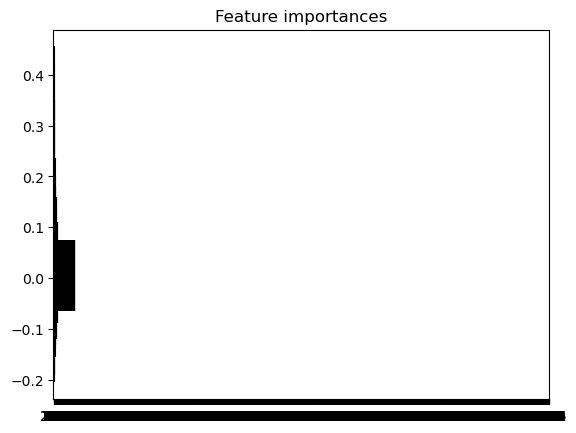

In [97]:
from sklearn import tree
importances = best_ada_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_ada_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


I will try to delete all the features that are not important

##### feature importance using mutual information

In [98]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X, y)
mi_scores[::3]  # show a few features with their MI scores

Sex                                          0.165307
Pclass                                       0.067173
Room                                         0.051682
AverageFareEmbarked                          0.047067
Ticket_234686                                0.044032
                                               ...   
Surname_Adams                                0.000000
Surname_Adahl                                0.000000
FirstName_Amelia "Mildred"                   0.000000
FirstName_Amin S (Marie Marthe Thuillard)    0.000000
FirstName_Yousseff                           0.000000
Name: MI Scores, Length: 725, dtype: float64

In [99]:
mi_scores.shape

(2173,)

In [100]:
mi_scores=mi_scores.loc[mi_scores >0]

In [101]:
mi_scores.shape

(1060,)

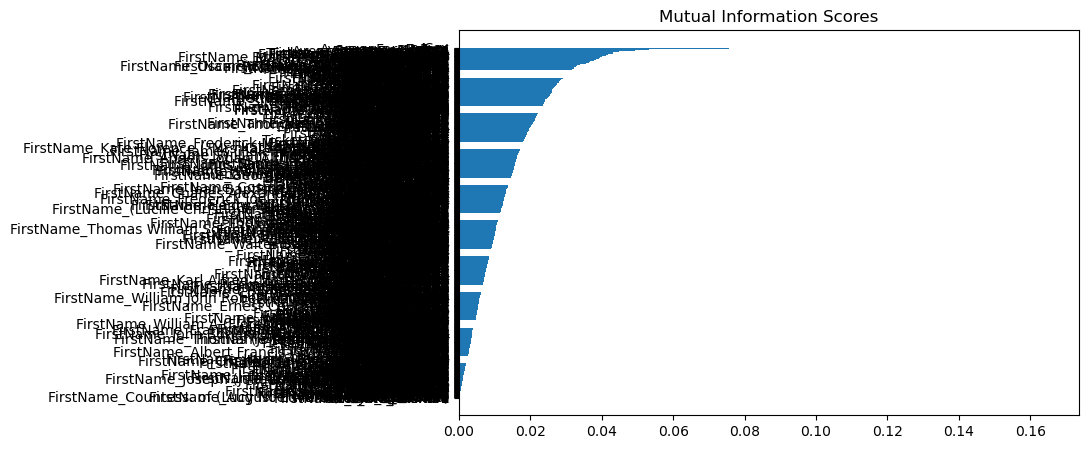

In [102]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Let's apply feature selection

#### 4) Feature importance

##### A) VarianceTreshold

In [103]:
from sklearn.feature_selection import VarianceThreshold

# create a VarianceThreshold object with threshold=0
vt = VarianceThreshold(threshold=0.1)

# fit the VarianceThreshold object to your data
vt.fit(train)

# get the indices of the non-constant features
non_const_idx = vt.get_support(indices=True)

# subset your data using the non-constant indices
train_vt = train.iloc[:, non_const_idx]

#### Let's see our new data

In [104]:
train_vt

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Title  \
PassengerId                                                              
1                 0.0     3.0  1.0  22.0    1.0    0.0   7.2500    0.0   
2                 1.0     1.0  0.0  38.0    1.0    0.0  71.2833    1.0   
3                 1.0     3.0  0.0  26.0    0.0    0.0   7.9250    0.0   
4                 1.0     1.0  0.0  35.0    1.0    0.0  53.1000    1.0   
5                 0.0     3.0  1.0  35.0    0.0    0.0   8.0500    0.0   
...               ...     ...  ...   ...    ...    ...      ...    ...   
887               0.0     2.0  1.0  27.0    0.0    0.0  13.0000    2.0   
888               1.0     1.0  0.0  19.0    0.0    0.0  30.0000    0.0   
889               0.0     3.0  0.0  24.0    1.0    2.0  23.4500    0.0   
890               1.0     1.0  1.0  26.0    0.0    0.0  30.0000    0.0   
891               0.0     3.0  1.0  32.0    0.0    0.0   7.7500    0.0   

             AverageFarePclass  AverageFareEmbarked  AverageFareSibSp  \
PassengerId                                                             
1                    13.675550            27.079812         44.147370   
2                    84.154687            59.954144         44.147370   
3                    13.675550            27.079812         25.692028   
4                    84.154687            27.079812         44.147370   
5                    13.675550            27.079812         25.692028   
...                        ...                  ...               ...   
887                  20.662183            27.079812         25.692028   
888                  84.154687            27.079812         25.692028   
889                  13.675550            27.079812         44.147370   
890                  84.154687            59.954144         25.692028   
891                  13.675550            13.276030         25.692028   

             AverageFareParch  AgeGroup  SurvivorFamily   Room  Embarked_C  \
PassengerId                                                                  
1                   25.586774       1.0             0.0    0.0         0.0   
2                   25.586774       2.0             0.0   85.0         1.0   
3                   25.586774       1.0             0.0    0.0         0.0   
4                   25.586774       1.0             0.0  123.0         0.0   
5                   25.586774       1.0             0.0    0.0         0.0   
...                       ...       ...             ...    ...         ...   
887                 25.586774       1.0             0.0    0.0         0.0   
888                 25.586774       1.0             0.0   42.0         0.0   
889                 64.337604       1.0             1.0    0.0         0.0   
890                 25.586774       1.0             0.0  148.0         1.0   
891                 25.586774       1.0             0.0    0.0         0.0   

             Embarked_S  Deck_N  
PassengerId                      
1                   1.0     1.0  
2                   0.0     0.0  
3                   1.0     1.0  
4                   1.0     0.0  
5                   1.0     1.0  
...                 ...     ...  
887                 1.0     1.0  
888                 1.0     0.0  
889                 1.0     1.0  
890                 0.0     0.0  
891                 0.0     1.0  

[891 rows x 18 columns]

##### B) AdaBoostClassifier with VT

We will tune again our model now with the new features

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm


# AdaBoostClassifier training
best_ada_clf = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 1.0, n_estimators = 200)
X_vt=train_vt.drop("Survived",axis=1)
y_vt=train_vt.Survived
X_train, X_val, y_train, y_val = train_test_split(X_vt, y_vt, test_size=0.33, random_state=42)
cv= StratifiedKFold(n_splits=5)
best_ada_clf.fit(X_train,y_train)
y_val_pred = best_ada_clf.predict(X_val)

# Calculate accuracy, confusion matrix, and classification report on validation set
accuracy = accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)
print("Accuracy score:", accuracy)
print("Confusion matrix:\n", cm)
print("Classification report:\n", report)

# Perform cross-validation on best classifier
cv_scores = []
for train_index, test_index in tqdm(cv.split(X_train, y_train)):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    best_ada_clf.fit(X_train_cv, y_train_cv)
    cv_scores.append(best_ada_clf.score(X_test_cv, y_test_cv))
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean accuracy: ", np.mean(cv_scores))
# Perform cross-validation predictions on validation set
y_pred_cv = cross_val_predict(best_ada_clf, X_val, y_val, cv=cv)

# Calculate confusion matrix and classification report on cross-validated predictions
cm_cv = confusion_matrix(y_val, y_pred_cv)
report_cv = classification_report(y_val, y_pred_cv)

print("Cross-validation confusion matrix:\n", cm_cv)
print("Cross-validation classification report:\n", report_cv)


Accuracy score: 0.8203389830508474
Confusion matrix:
 [[148  27]
 [ 26  94]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       175
         1.0       0.78      0.78      0.78       120

    accuracy                           0.82       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



5it [00:01,  2.53it/s]


Cross-validation accuracy scores:  [0.7666666666666667, 0.8235294117647058, 0.773109243697479, 0.7983193277310925, 0.7899159663865546]
Mean accuracy:  0.7903081232492998
Cross-validation confusion matrix:
 [[152  23]
 [ 35  85]]
Cross-validation classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       175
         1.0       0.79      0.71      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



We will do it with PCA

##### C) SelectKBest

Searching K and score_func of SelecctKBest with hyperparameter tuning of AdaBoostClassifier

In [106]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Create a pipeline with SelectKBest and AdaBoostClassifier
pipe = Pipeline([
    ('selectkbest', SelectKBest()),
    ('ada', AdaBoostClassifier())
])

# Define the grid of parameters to search over
param_grid = {
    'selectkbest__k': [5, 8, 13, 15, 17],
    'selectkbest__score_func': [chi2, f_classif],
    'ada__n_estimators': [100, 200, 300],
    'ada__learning_rate': [0.01, 0.1, 1.0],
    'ada__algorithm': ['SAMME', 'SAMME.R']
}

# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(pipe, param_grid, cv=cv, verbose=1)
grid_search.fit(X_vt, y_vt)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1.0, 'ada__n_estimators': 300, 'selectkbest__k': 15, 'selectkbest__score_func': <function chi2 at 0x7f00b937c5f0>}
Best cross-validation score: 0.8215805661917017


In [107]:
#Creating new Ada and traning set
best_ada_clf=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=300)
selector=SelectKBest(chi2,k=15)
selector.fit(X_vt, y_vt)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
train_ada_sel = train_vt.iloc[:,cols_idxs]
train_ada_sel

Survived  Pclass  Sex  SibSp  Parch     Fare  Title  \
PassengerId                                                        
1                 0.0     3.0  1.0    1.0    0.0   7.2500    0.0   
2                 1.0     1.0  0.0    1.0    0.0  71.2833    1.0   
3                 1.0     3.0  0.0    0.0    0.0   7.9250    0.0   
4                 1.0     1.0  0.0    1.0    0.0  53.1000    1.0   
5                 0.0     3.0  1.0    0.0    0.0   8.0500    0.0   
...               ...     ...  ...    ...    ...      ...    ...   
887               0.0     2.0  1.0    0.0    0.0  13.0000    2.0   
888               1.0     1.0  0.0    0.0    0.0  30.0000    0.0   
889               0.0     3.0  0.0    1.0    2.0  23.4500    0.0   
890               1.0     1.0  1.0    0.0    0.0  30.0000    0.0   
891               0.0     3.0  1.0    0.0    0.0   7.7500    0.0   

             AverageFarePclass  AverageFareEmbarked  AverageFareSibSp  \
PassengerId                                                             
1                    13.675550            27.079812         44.147370   
2                    84.154687            59.954144         44.147370   
3                    13.675550            27.079812         25.692028   
4                    84.154687            27.079812         44.147370   
5                    13.675550            27.079812         25.692028   
...                        ...                  ...               ...   
887                  20.662183            27.079812         25.692028   
888                  84.154687            27.079812         25.692028   
889                  13.675550            27.079812         44.147370   
890                  84.154687            59.954144         25.692028   
891                  13.675550            13.276030         25.692028   

             AgeGroup  SurvivorFamily   Room  Embarked_C  Embarked_S  
PassengerId                                                           
1                 1.0             0.0    0.0         0.0         1.0  
2                 2.0             0.0   85.0         1.0         0.0  
3                 1.0             0.0    0.0         0.0         1.0  
4                 1.0             0.0  123.0         0.0         1.0  
5                 1.0             0.0    0.0         0.0         1.0  
...               ...             ...    ...         ...         ...  
887               1.0             0.0    0.0         0.0         1.0  
888               1.0             0.0   42.0         0.0         1.0  
889               1.0             1.0    0.0         0.0         1.0  
890               1.0             0.0  148.0         1.0         0.0  
891               1.0             0.0    0.0         0.0         0.0  

[891 rows x 15 columns]

In [108]:
#List of features selected
list_features_df=train_ada_sel.drop('Survived',axis=1)
list_features=list_features_df.columns.tolist()
list_features

['Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Fare',
 'Title',
 'AverageFarePclass',
 'AverageFareEmbarked',
 'AverageFareSibSp',
 'AgeGroup',
 'SurvivorFamily',
 'Room',
 'Embarked_C',
 'Embarked_S']

##### D) AdaBoostClassifier with SelectKBest

In [109]:
best_ada_clf=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=300)
X_ada_sel=train_ada_sel.drop("Survived",axis=1)
y_ada_sel=train_ada_sel.Survived
X_train, X_val, y_train, y_val = train_test_split(X_ada_sel, y_ada_sel, test_size=0.33, random_state=42)
cv= StratifiedKFold(n_splits=5)
best_ada_clf.fit(X_train,y_train)
y_val_pred = best_ada_clf.predict(X_val)

# Calculate accuracy, confusion matrix, and classification report on validation set
accuracy = accuracy_score(y_val, y_val_pred)
cm = confusion_matrix(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)
print("Accuracy score:", accuracy)
print("Confusion matrix:\n", cm)
print("Classification report:\n", report)

# Perform cross-validation on best classifier
cv_scores = []
for train_index, test_index in tqdm(cv.split(X_train, y_train)):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    best_ada_clf.fit(X_train_cv, y_train_cv)
    cv_scores.append(best_ada_clf.score(X_test_cv, y_test_cv))
print("Cross-validation accuracy scormes: ", cv_scores)
print("Mean accuracy: ", np.mean(cv_scores))
# Perform cross-validation predictions on validation set
y_pred_cv = cross_val_predict(best_ada_clf, X_val, y_val, cv=cv)

# Calculate confusion matrix and classification report on cross-validated predictions
cm_cv = confusion_matrix(y_val, y_pred_cv)
report_cv = classification_report(y_val, y_pred_cv)

print("Cross-validation confusion matrix:\n", cm_cv)
print("Cross-validation classification report:\n", report_cv)


Accuracy score: 0.8271186440677966
Confusion matrix:
 [[150  25]
 [ 26  94]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       175
         1.0       0.79      0.78      0.79       120

    accuracy                           0.83       295
   macro avg       0.82      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295



5it [00:02,  1.76it/s]


Cross-validation accuracy scormes:  [0.7583333333333333, 0.8151260504201681, 0.7983193277310925, 0.7815126050420168, 0.8151260504201681]
Mean accuracy:  0.7936834733893556
Cross-validation confusion matrix:
 [[151  24]
 [ 35  85]]
Cross-validation classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.84       175
         1.0       0.78      0.71      0.74       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



##### E) ROC Curve

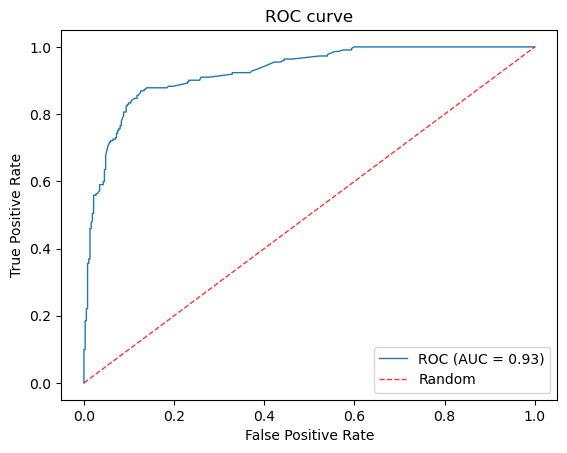

In [110]:
from sklearn.metrics import roc_curve, auc

# get the predicted probabilities
y_score = best_ada_clf.predict_proba(X_train)[:,1]

# calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, lw=1, alpha=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', label='Random', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

##### F) Learning Curve

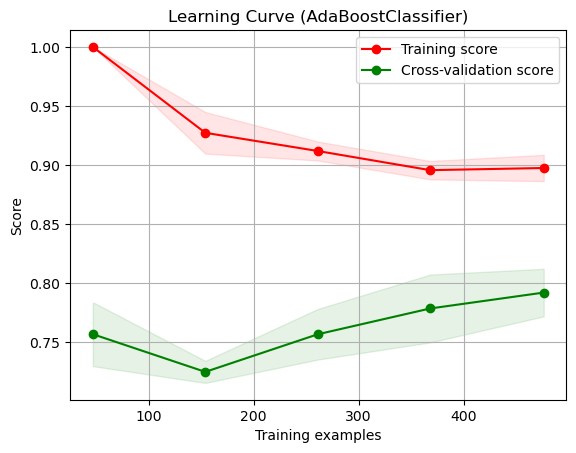

In [111]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(best_ada_clf, "Learning Curve (AdaBoostClassifier)", X_train, y_train, cv=cv)
plt.show()


### Submission

In [112]:
#First step preprocess the test set
test=pd.read_csv('/kaggle/input/titanic/test.csv')
df_test=preprocess(test)
#Reload the data and preprocessing
train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_train=preprocess(train)
#Splitting the data
X=df_train
y=train.Survived

In [113]:
best_ada_clf=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=300)
best_ada_clf.fit(X,y)
predictions=best_ada_clf.predict(df_test)

In [114]:
submission=test.loc[:,['PassengerId']]
submission['Survived']=predictions
submission.to_csv(r'submission_titanic.csv', index=False, header=True)